### Trước khi tiếp tục phần phân tích ta nạp các thư viện và tải các dữ liệu cần thiết

In [1]:
# write your code here
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
#pd.set_option('display.max_rows', None)
#pd.set_option("display.max_columns", 100)
#pd.set_option("display.expand_frame_repr",False)

- Load data 

In [2]:
df_trip = pd.read_csv('data/trip_ver_2.csv', parse_dates=[2,3])
df_trip.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log10_trip_duration,direct_distance,average_speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2.658011,1502.171837,11.885316
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2.821514,1808.659969,9.820778
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,3.327155,6379.687175,10.813029
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2.632457,1483.632481,12.450063
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2.638489,1187.037659,9.823760


In [3]:
df_weather = pd.read_csv('data/weather_ver_2.csv', parse_dates=[0])
df_weather.head()


,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,2016-01-01,42,34,38.0,0.0,0.0,0.0
1,2016-01-02,40,32,36.0,0.0,0.0,0.0
2,2016-01-03,45,35,40.0,0.0,0.0,0.0
3,2016-01-04,36,14,25.0,0.0,0.0,0.0
4,2016-01-05,29,11,20.0,0.0,0.0,0.0


In [4]:
df_fastest_routes_train = pd.read_csv('data/fastest_routes_train_ver_2.csv')
df_fastest_routes_train.head()


,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,1614.9,140.1,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,1393.5,189.4,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."


### 3.2. Bivariate Analysis and Multivariate Analysis
- Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.
<br><br/>
- Multivariate Data Analysis is a statistical technique used to analyze data that originates from more than one variable.
<br><br/>
- Now look at the relationship between each of the variables with the target variable **trip_duration**. We’ll start with a few very simple questions.

#### 3.2.1 How pickup location, drop-off location, the direct distance of pickup location and drop-off location impact on trip duration?

#### 1. Phân tích mối quan hệ giữa vị trí đón và trả khách đối với thời gian chuyến đi

- Ta sẽ dùng bản đồ HeatMap của Folium để khảo sát thời gian chuyến đi của taxi theo các vị trí trên bản đồ

In [5]:
# Create data set
pd.set_option('mode.chained_assignment', None)
df_location_duration = df_trip[['pickup_latitude','pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'trip_duration']]
df_location_duration['log10_trip_duration'] = np.log10(df_location_duration['trip_duration'])
df_location_duration.head()


,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_duration,log10_trip_duration
0,40.767937,-73.982155,40.765602,-73.964630,455,2.658011
1,40.738564,-73.980415,40.731152,-73.999481,663,2.821514
2,40.763939,-73.979027,40.710087,-74.005333,2124,3.327155
3,40.719971,-74.010040,40.706718,-74.012268,429,2.632457
4,40.793209,-73.973053,40.782520,-73.972923,435,2.638489


- Tạo hàm *heat_map* biểu diễn thời gian chuyến đi theo vị trí tọa độ

In [6]:
import folium
from folium.plugins import HeatMap

def heat_map(df, latitude='latitude', longitude ='longitude', weight='count'):
    # Chọn điểm định vị trung tâm của bản đồ 
    middle_latitude = df[latitude].median()
    middle_longitude = df[longitude].median()
    NYC_map = folium.Map(location=[middle_latitude, middle_longitude], zoom_start=10)
    
    # Nhóm dữ liệu bởi tọa độ
    if weight == 'count':
        points = df[[latitude, longitude]]
        points['count'] = 1
        points_group = points.groupby([latitude, longitude], as_index=False).sum()
    else:
        points = df[[latitude, longitude, weight]]
        points_group = points.groupby([latitude, longitude], as_index=False).median()
        
    maximum = max(points_group[weight])
    heatMap = HeatMap(data=points_group, 
                      min_opacity=0.5,
                      blur=20,
                      #gradient = {0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'},
                      max_val=maximum,
                      radius=15, 
                     )
    heatMap.add_to(NYC_map)
    return NYC_map


- Thể hiện trên bản đồ HeatMap *pickup_location* và *trip_duration*

In [ ]:
#heat_map(df_location_duration, latitude='pickup_latitude', longitude ='pickup_longitude', weight='log10_trip_duration')


- Thể hiện trên bản đồ HeatMap *dropoff_location* và *trip_duration*

In [ ]:
#heat_map(df_location_duration, latitude='dropoff_latitude', longitude ='dropoff_longitude', weight='log10_trip_duration')


- <span style ="color:blue">Nhận xét: 
     - Quan sát biểu đồ ta nhận thấy các chuyến đi có thời gian lớn (độ cao điểm biểu diễn lớn hơn, màu sắc đỏ hơn) tập trung chủ yếu ở quận Manhattan và một số khu vực lân cận đối diện với Manhattan bên kia sông Đông (East River). Ngoài ra còn tập trung ở sân bay john F.Kennedy

#### 2. Tiếp theo ta sẽ tìm hiểu về mối quan hệ giữa khoảng cách giữa điểm đón và điểm trả khách so với thời gian chuyến đi

In [9]:
# Create dataset
df_direct_distance_duration = df_trip[['direct_distance','trip_duration']]
df_direct_distance_duration = df_direct_distance_duration[df_direct_distance_duration['direct_distance']!=0]
df_direct_distance_duration['log10_trip_duration'] = np.log10(df_trip['trip_duration'])
df_direct_distance_duration['log10_direct_distance'] = np.log10(df_trip['direct_distance'])
df_direct_distance_duration.head()


,direct_distance,trip_duration,log10_trip_duration,log10_direct_distance
0,1502.171837,455,2.658011,3.176720
1,1808.659969,663,2.821514,3.257357
2,6379.687175,2124,3.327155,3.804799
3,1483.632481,429,2.632457,3.171326
4,1187.037659,435,2.638489,3.074464


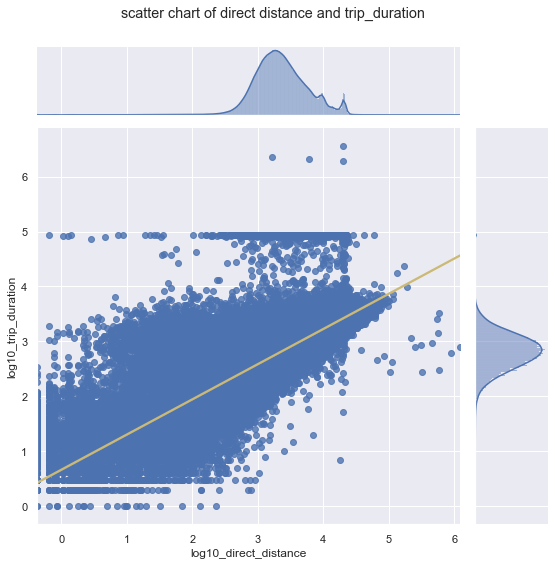

In [10]:
# Vẽ đồ thị biểu biễn 
import seaborn as sns
from scipy.stats import stats

sns.set()
plot = sns.jointplot(x="log10_direct_distance", y="log10_trip_duration", data=df_direct_distance_duration,
                     height=8, ratio=5, 
                     kind='reg', joint_kws={'line_kws':{'color':'y'}},
                     #stat_func=None ,#stats.pearsonr,
                     );
plot.fig.suptitle('scatter chart of direct distance and trip_duration');
plot.fig.subplots_adjust(top=0.91);


- <span style ="color:blue">Nhận xét: 
     - Qua biểu đồ ta thấy khi khoảng cách tăng thì thời gian cũng tăng theo. Hệ số tương quan là khá mạnh khi tính theo thang log10

### 3.2.2 How pickup datetime affects to trip duration? Do quieter days and hours lead to faster trips?

In [11]:
# Tạo các cột phân loại theo thời gian khác nhau từ cột pickup_datetime: date, weekday, week, month, day, hour.
category = ['date', 'weekday', 'week', 'month', 'day', 'hour']
for cat in category:
    data = getattr(df_trip['pickup_datetime'].dt, cat)
    if cat == 'week':
        data = [x if x!=53 else 0 for x in data]
    df_trip[cat] = data
    
df_trip.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log10_trip_duration,direct_distance,average_speed,date,weekday,week,month,day,hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2.658011,1502.171837,11.885316,2016-03-14,0,11,3,14,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2.821514,1808.659969,9.820778,2016-06-12,6,23,6,12,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,3.327155,6379.687175,10.813029,2016-01-19,1,3,1,19,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2.632457,1483.632481,12.450063,2016-04-06,2,14,4,6,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2.638489,1187.037659,9.823760,2016-03-26,5,12,3,26,13


In [12]:
# Tạo hàm vẽ đồ thị biểu diễn thời gian chuyến đi theo thời điểm đón
import seaborn as sns

def myline(df, x ='date', y ='trip_duration', deg=1, figsize=(12,6), legend_loc='upper right'):
    
    df_test = df[[x,y]]
    df_group = df_test.groupby(x, as_index=False).median()
    X = [i for i in range(0, len(df_group))]
    Y = df_group[y]
    trend = np.polyfit(X, Y, deg)
    trend_line = np.poly1d(trend) 
    plt.figure(figsize=figsize);
    ax = sns.lineplot(x=x, y=y, data=df_group, marker='s', label=y);
    plt.plot(df_group[x], trend_line(X), label='trend line');
    plt.title('Line chart of trip duration by {}'.format(x));
    plt.legend(loc=legend_loc)
    return df_group, ax


#### 1. Phân tích sự ảnh hưởng của thời gian đón theo ngày lên thời gian chuyến đi

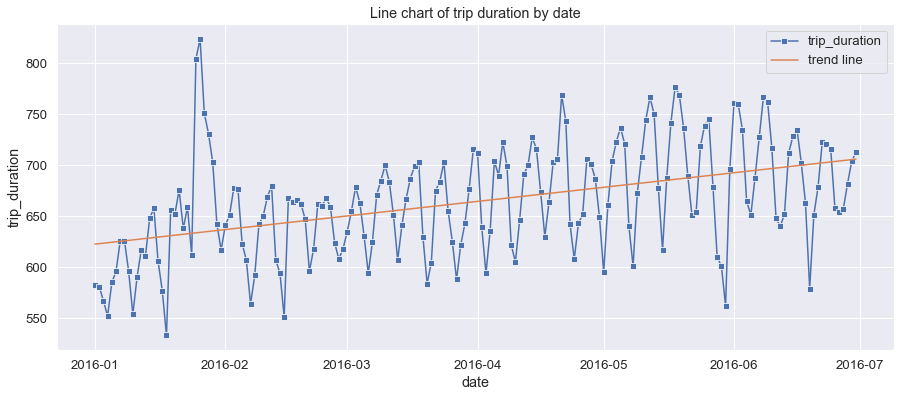

In [13]:
# Vẽ đồ thị biểu diễn
sns.set(font_scale=1.2, style='darkgrid')
myline(df_trip, x ='date', y ='trip_duration', deg=1, figsize=(15,6));


- <span style ="color:blue"> Nhận xét:
    - Thời gian hoạt động theo ngày dường như có tính chu kỳ đều đặn với khoảng cách là khoảng 7 ngày ( khoảng cách giữa 2 đỉnh thấp nhất hoặc cao nhất). 
    - Ta thấy thời gian chuyến đi có xu hướng tăng theo ngày. Riêng ngày 26/1 thời gian tăng đột biến

#### 2. Phân tích sự ảnh hưởng của thời gian đón theo ngày trong tuần

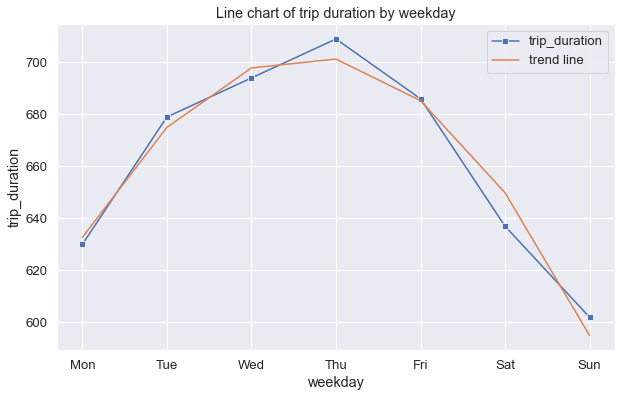

In [14]:
# Vẽ đồ thị biểu diễn
sns.set(font_scale=1.2, style='darkgrid')
df_weekday, ax_weekday = myline(df_trip, x ='weekday', y ='trip_duration', deg=2, figsize=(10,6));
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);


- <span style ="color:blue"> Nhận xét:
    - Thời gian chuyến đi thấp nhất vào chủ nhật, tăng dần từ thứ 2 đạt đỉnh cao vào thứ 5 rồi giảm dần.
    

- Ta thử phân tích ANOVA để kiểm tra sự khác biệt thời gian chuyến đi của các ngày trong tuần

In [15]:
# Lọc dữ liệu để giảm ảnh hưởng của nhiễu
from filter_outlier import filter_outlier_value_range
df_weekday = df_trip[['weekday', 'trip_duration']]
df_weekday = filter_outlier_value_range(df_weekday, filter_columns = ['trip_duration'])
df_weekday.head()


,weekday,trip_duration
0,0,455.0
1,6,663.0
3,2,429.0
4,5,435.0
5,5,443.0


In [16]:
from scipy import stats
import seaborn as sns

df_F_test = df_weekday.groupby('weekday', as_index=False)
f_val, p_val = stats.f_oneway(*[df_F_test.get_group(i)['trip_duration'] for i in range(len(df_F_test))])  
F_crit = stats.f.ppf(q=1-0.05, dfn=len(df_F_test), dfd=len(df_weekday)-len(df_F_test))
print('F-test:', f_val)
print('p-value:', p_val)
print('F-crit:', F_crit)


F-test: 903.3998764418687
p-value: 0.0
F-crit: 2.0095980760340773


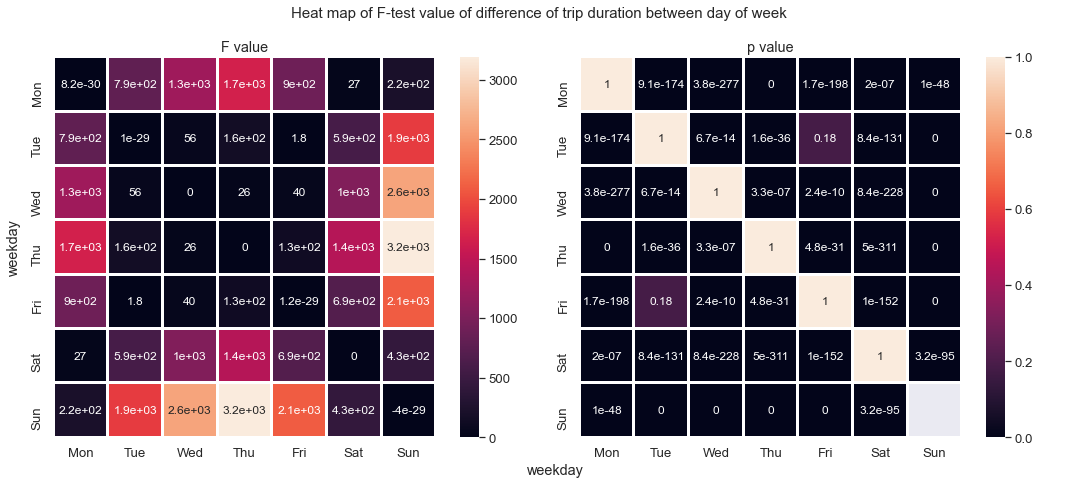

In [17]:
from scipy import stats
import seaborn as sns

sns.set(font_scale=1.2, style='dark')

df_F_test = df_weekday.groupby('weekday', as_index=False)

F_val = np.zeros([7,7])
P_val = np.zeros([7,7])

for i in range(7):
    for j in range(7):
        f_val, p_val = stats.f_oneway(df_F_test.get_group(list(df_F_test.indices)[i])['trip_duration'],
                                      df_F_test.get_group(list(df_F_test.indices)[j])['trip_duration'])  
        F_val[i,j] = f_val
        P_val[i,j] = p_val
                
df_F_val = pd.DataFrame(F_val)
df_P_val = pd.DataFrame(P_val)

fig, axes = plt.subplots(1, 2, figsize=(18,7))
fig_1 = sns.heatmap(df_F_val, annot=True, annot_kws={"size": 12},
                    xticklabels=ax_weekday.get_xticklabels(), yticklabels=ax_weekday.get_xticklabels(), ax=axes[0], linewidths=2)
fig_1.set_title('F value');
fig_2 = sns.heatmap(df_P_val, annot=True, annot_kws={"size": 12},
                    xticklabels=ax_weekday.get_xticklabels(), yticklabels=ax_weekday.get_xticklabels(), ax=axes[1], linewidths=2)
fig_2.set_title('p value');
fig.suptitle('Heat map of F-test value of difference of trip duration between day of week', fontsize=15);

fig.add_subplot(111, frame_on=False);
plt.tick_params(labelcolor="none", bottom=False, left=False);
plt.xlabel("weekday");
plt.ylabel("weekday");
plt.subplots_adjust(wspace=0.1);


- <span style ="color:blue"> Nhận xét:
    - Qua bảng F-test ta thấy giá trị cao nhất thuộc về cặp thứ 5 và chủ nhật (min và max), giá trị F theo cặp các ngày gần nhau nói lên xu hướng tăng giảm là có thứ tự như đã phân tích

#### 3. Tiếp theo ta phân tích sự ảnh hưởng của thời gian đón theo tuần lên thời gian chuyến đi

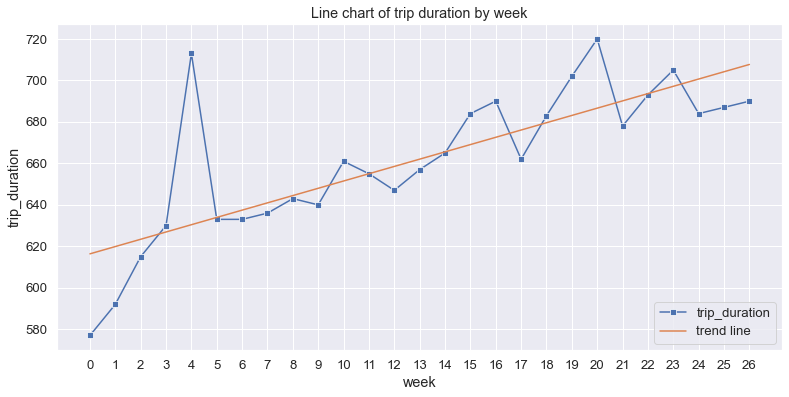

In [18]:
# Vẽ đồ thị biểu diễn
sns.set(font_scale=1.2, style='darkgrid')
df_weekday, _ = myline(df_trip, x ='week', y ='trip_duration', deg=1, figsize=(13,6), legend_loc='lower right');
plt.xticks(np.arange(0, 27, step=1));


- <span style ="color:blue"> Nhận xét:
    - Thời gian chuyến đi biến đổi khá mạnh, có xu hướng tăng theo tuần
    

- Ta thử phân tích ANOVA để kiểm tra sự khác biệt thời gian chuyến đi của các tuần

In [19]:
# Lọc dữ liệu để giảm ảnh hưởng của nhiễu
from filter_outlier import filter_outlier_value_range
df_week = df_trip[['week', 'trip_duration']]
df_week = filter_outlier_value_range(df_week, filter_columns = ['trip_duration'])
df_week.head()


,week,trip_duration
0,11,455.0
1,23,663.0
3,14,429.0
4,12,435.0
5,4,443.0


In [20]:
from scipy import stats
import seaborn as sns

df_F_test = df_week.groupby('week', as_index=False)

f_val, p_val = stats.f_oneway(*[df_F_test.get_group(i)['trip_duration'] for i in range(len(df_F_test))])  
f_val, p_val


(164.7961642439772, 0.0)

- <span style ="color:blue"> Nhận xét:
   - F-test khá lớn, phân tích có ý nghĩa thống kê nhất định, xu hướng phân tích là có cơ sở

#### 4. Tiếp theo ta phân tích sự ảnh hưởng của thời gian đón theo ngày trong tháng lên thời gian chuyến đi

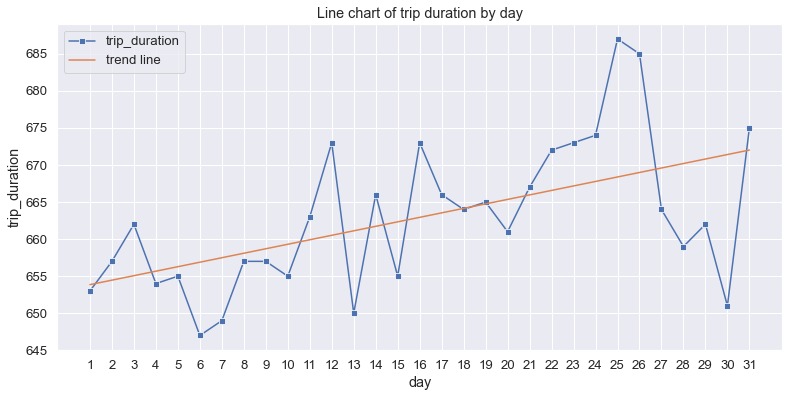

In [21]:
# Vẽ đồ thị thời gian chuyến đi theo ngày trong tháng
sns.set(font_scale=1.2, style='darkgrid')
myline(df_trip, x ='day', y ='trip_duration', deg=1, figsize=(13,6), legend_loc='upper left');
plt.xticks(np.arange(1, 32, step=1));


- <span style ="color:blue"> Nhận xét:
    - Thời gian chuyến đi biến đổi khá mạnh, có xu hướng tăng theo ngày
    

- Ta thử phân tích ANOVA để kiểm tra sự khác biệt thời gian chuyến đi của các ngày trong tháng

In [22]:
# Lọc dữ liệu để giảm ảnh hưởng của nhiễu
from filter_outlier import filter_outlier_value_range
df_day = df_trip[['day', 'trip_duration']]
df_day = filter_outlier_value_range(df_day, filter_columns=['trip_duration'])
df_day.head()


,day,trip_duration
0,14,455.0
1,12,663.0
3,6,429.0
4,26,435.0
5,30,443.0


In [23]:
from scipy import stats

df_F_test = df_day.groupby('day', as_index=False)

f_val, p_val = stats.f_oneway(*[df_F_test.get_group(i)['trip_duration'] for i in range(1, len(df_F_test)+1)])  
f_val, p_val


(11.294788500263211, 5.382583353682221e-54)

- <span style ="color:blue"> Nhận xét:
   - F-test giảm mạnh so với phân tích theo tuần, tuy nhiên vẫn có ý nghĩa thống kê nhất định. Xu hướng tăng yếu theo ngày

#### 5. Tiếp theo ta phân tích sự ảnh hưởng của thời gian đón theo tháng lên thời gian chuyến đi

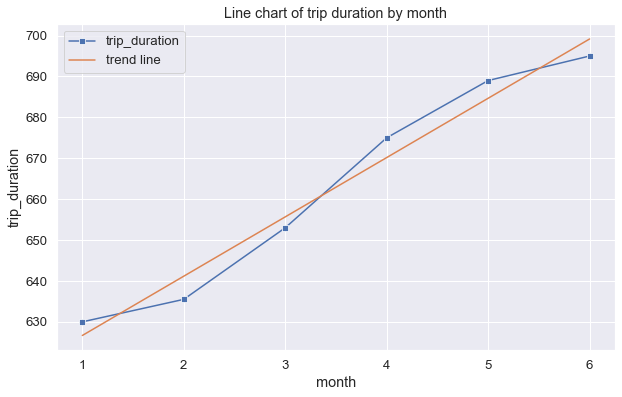

In [24]:
# Vẽ đồ thị thời gian chuyến đi theo tháng
sns.set(font_scale=1.2, style='darkgrid')
_, ax_month = myline(df_trip, x ='month', y ='trip_duration', deg=1, figsize=(10,6), legend_loc='upper left');


- <span style ="color:blue"> Nhận xét:
    - Thời gian chuyến đi biến đổi rất mượt theo một đường cong bậc 3, thời gian di chuyển có xu hướng tăng rõ rệt theo tháng
    

- Ta thử phân tích ANOVA để kiểm tra sự khác biệt thời gian chuyến đi theo tháng

In [25]:
# Lọc dữ liệu để giảm ảnh hưởng của nhiễu
from filter_outlier import filter_outlier_value_range
df_month = df_trip[['month', 'trip_duration']]
df_month = filter_outlier_value_range(df_month, filter_columns=['trip_duration'])
df_month.describe()


,month,trip_duration
count,1.383926e+06,1.383926e+06
mean,3.500049e+00,7.312138e+02
std,1.679735e+00,4.474471e+02
min,1.000000e+00,1.000000e+00
25%,2.000000e+00,3.840000e+02
50%,3.000000e+00,6.310000e+02
75%,5.000000e+00,9.910000e+02
max,6.000000e+00,2.087000e+03


- Ta thử phân tích ANOVA để kiểm tra sự khác biệt thời gian chuyến đi giữa các tháng

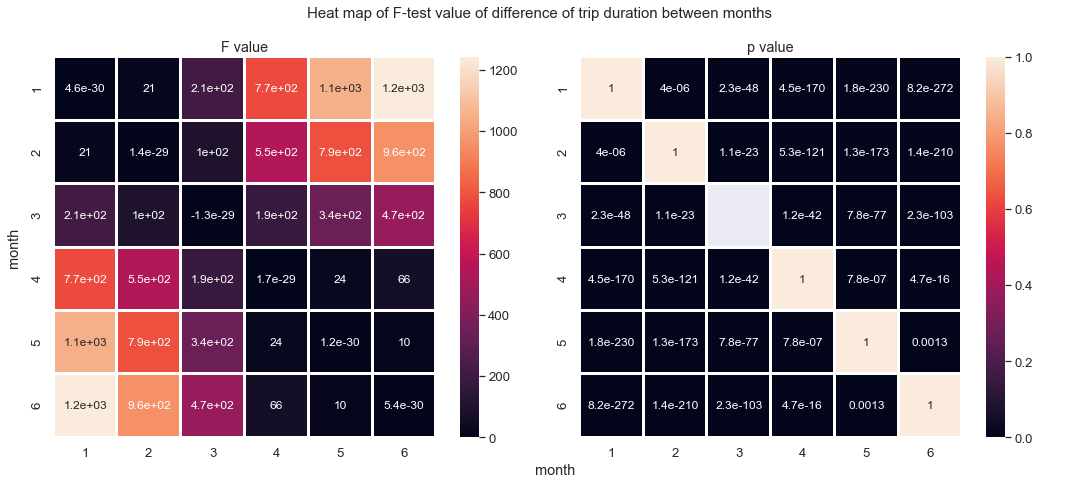

In [26]:
from scipy import stats
import seaborn as sns

sns.set(font_scale=1.2, style='dark')

df_F_test = df_month.groupby('month', as_index=False)

F_val = np.zeros([6,6])
P_val = np.zeros([6,6])

for i in range(6):
    for j in range(6):
        f_val, p_val = stats.f_oneway(df_F_test.get_group(i+1)['trip_duration'],
                                      df_F_test.get_group(j+1)['trip_duration'])  
        F_val[i,j] = f_val
        P_val[i,j] = p_val
                
df_F_val = pd.DataFrame(F_val,index=[1,2,3,4,5,6])
df_P_val = pd.DataFrame(P_val,index=[1,2,3,4,5,6])

fig, axes = plt.subplots(1, 2, figsize=(18,7))
fig_1 = sns.heatmap(df_F_val, annot=True, annot_kws={"size": 12},
                    xticklabels=[1,2,3,4,5,6], ax=axes[0], linewidths=2)
fig_1.set_title('F value');
fig_2 = sns.heatmap(df_P_val, annot=True, annot_kws={"size": 12},
                    xticklabels=[1,2,3,4,5,6], ax=axes[1], linewidths=2)
fig_2.set_title('p value');
fig.suptitle('Heat map of F-test value of difference of trip duration between months', fontsize=15);

fig.add_subplot(111, frame_on=False);
plt.tick_params(labelcolor="none", bottom=False, left=False);
plt.xlabel("month");
plt.ylabel("month");
plt.subplots_adjust(wspace=0.1);


- <span style ="color:blue"> Nhận xét:
    - Các giá trị F-test của tất cả các các cặp tháng liên tiếp nhau là đáng kể, chứng tỏ xu hướng tăng theo tháng

#### 6. Cuối cùng ta phân tích sự ảnh hưởng của thời gian đón theo giờ trong ngày lên thời gian chuyến đi

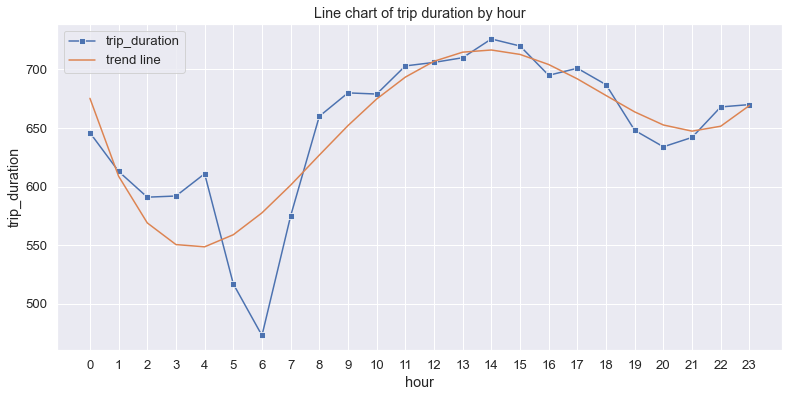

In [27]:
# Vẽ đồ thị thời gian chuyến đi theo giờ
sns.set(font_scale=1.2, style='darkgrid')
myline(df_trip, x ='hour', y ='trip_duration', deg=4, figsize=(13,6), legend_loc='upper left');
plt.xticks(np.arange(0, 24, step=1));


- <span style="color:blue"> Nhận xét: 
    - Theo biểu đồ ta thấy rõ xu hướng tăng giảm thời gian chuyến đi theo các múi giờ trong ngày. Thấp nhất là khoảng 6h sáng, thời gian tăng dần và đạt cao nhất vào khoảng từ 11h đến 14h chiều. Thời gian bắt đầu giảm và đạt mức thấp thứ hai vào khoảng 20h tối. Sau đó tăng nhẹ dần đến khoảng 23 giờ tối rồi giảm dần cho đến 6h sáng ngày hôm sau.
    - Vậy thời gian đạt đỉnh thấp vào 2 múi giờ 6h sáng và 20h tối trong đấy 6h là thấp nhất
    - Đạt đỉnh cao vào các múi giờ 11h:14h chiều và 23h tối trong đó cao nhất vào 11h:14h chiều

- Ta thử phân tích ANOVA để kiểm tra sự khác biệt thời gian chuyến đi của các múi giờ với nhau

In [28]:
# Lọc dữ liệu để giảm ảnh hưởng của nhiễu
from filter_outlier import filter_outlier_value_range
df_hour = df_trip[['hour', 'trip_duration']]
df_hour = filter_outlier_value_range(df_hour, filter_columns=['trip_duration'])
df_hour.describe()


,hour,trip_duration
count,1.383926e+06,1.383926e+06
mean,1.358017e+01,7.312138e+02
std,6.459172e+00,4.474471e+02
min,0.000000e+00,1.000000e+00
25%,9.000000e+00,3.840000e+02
50%,1.400000e+01,6.310000e+02
75%,1.900000e+01,9.910000e+02
max,2.300000e+01,2.087000e+03


In [29]:
from scipy import stats

df_F_test = df_hour.groupby('hour', as_index=False)

f_val, p_val = stats.f_oneway(*[df_F_test.get_group(i)['trip_duration'] for i in range(len(df_F_test))])  
f_val, p_val


(432.77052647890434, 0.0)

- <span style ="color:blue"> Nhận xét:
    - Giá trị F-test rất lớn và p-value bé chứng tỏ các giá trị là khác biệt, tuy nhiên ta sẽ phân tích theo cặp giờ để thấy rõ hơn sự khác biệt 
    

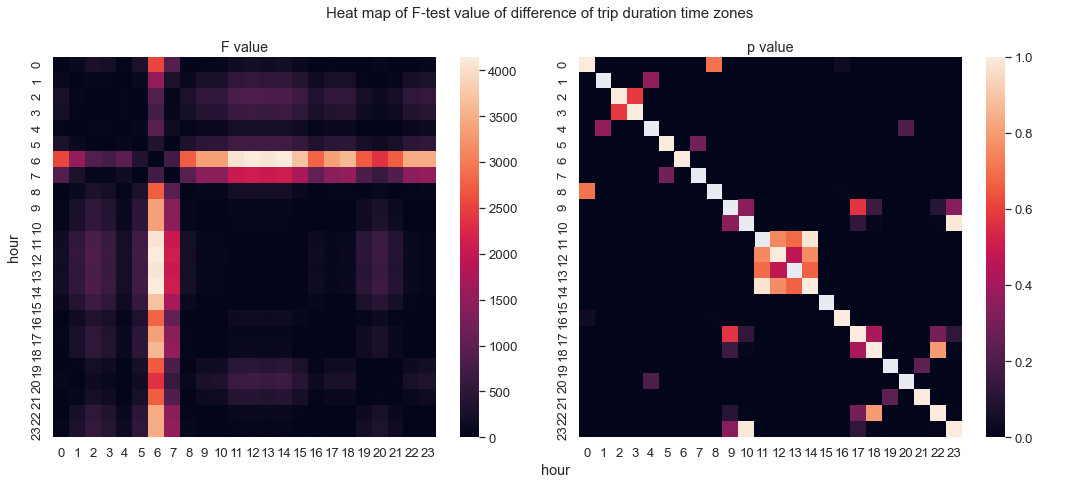

In [30]:
from scipy import stats
import seaborn as sns

sns.set(font_scale=1.2, style='dark')

df_F_test =  df_hour.groupby('hour', as_index=False)

F_val = np.zeros([24,24])
P_val = np.zeros([24,24])

for i in range(24):
    for j in range(24):
        f_val, p_val = stats.f_oneway(df_F_test.get_group(i)['trip_duration'],
                                      df_F_test.get_group(j)['trip_duration'])  
        F_val[i,j] = f_val
        P_val[i,j] = p_val
                
df_F_val = pd.DataFrame(F_val)
df_P_val = pd.DataFrame(P_val)

fig, axes = plt.subplots(1, 2, figsize=(18,7))
fig_1 = sns.heatmap(df_F_val, annot=False, annot_kws={"size": 12},
                    ax=axes[0], linewidths=0)
fig_1.set_title('F value');
fig_2 = sns.heatmap(df_P_val, annot=False, annot_kws={"size": 12},
                    ax=axes[1], linewidths=0)
fig_2.set_title('p value');
fig.suptitle('Heat map of F-test value of difference of trip duration time zones', fontsize=15);

fig.add_subplot(111, frame_on=False);
plt.tick_params(labelcolor="none", bottom=False, left=False);
plt.xlabel("hour");
plt.ylabel("hour");
plt.subplots_adjust(wspace=0.1);


- <span style ="color:blue"> Nhận xét:
    - Qua bảng F-test ta nhận thấy sự khác biệt lớn nhất giữa múi giờ 6h với nhóm múi giờ 11h đến 14h và 6h với 23h. Chứng tỏ xu hướng tăng giảm theo giờ như phân tích là có cơ sở

- <span style ="color:blue"> Kết luận chung:
    - Thời gian chuyến đi của taxi tăng theo ngày từ đầu năm đến hết tháng 6
    - Thời gian taxi diễn biến theo chu kỳ 1 tuần lễ. Một đường cong hình sin với đỉnh cao là thứ 5 và đỉnh thấp là chủ nhật.
    - Thời gian taxi diễn biến theo giờ trong ngày. Thấp nhất vào 6h sáng, cao nhất là vào 11h đến 14h chiều.
    - Taxi di chuyển nhanh hơn vào các ngày và giờ yên tĩnh. Giờ yên tĩnh được ghi nhận là từ lúc 0h cho đến 6h sáng (lúc phần đông mọi người đang ngủ). Ngày yên tĩnh được ghi nhận là ngày chủ nhật (lúc mọi người nghỉ ngơi chuẩn bị cho một tuần làm việc mới)

### 3.2.3	How different numbers of passengers and the different vendors are correlated with the duration of the trip?

   #### 3.2.3.1   Phân tích sự tương quan giữa số hành khách đến thời gian chuyến đi

In [31]:
# Tạo bảng dữ liệu
df_passenger_count_duration = df_trip[['passenger_count', 'trip_duration']]
df_passenger_count_duration.head()


,passenger_count,trip_duration
0,1,455
1,1,663
2,1,2124
3,1,429
4,1,435


In [32]:
# Lọc dữ liệu các chuyến đi của nhóm hành khách với số lượng ít là 0,7,8 và 9 (phân tích ở phần 1)
df_passenger_count_duration = df_passenger_count_duration.query('passenger_count !=0 \
                                                                & passenger_count !=7 \
                                                                & passenger_count !=8 \
                                                                & passenger_count !=9')
df_passenger_count_duration.head()


,passenger_count,trip_duration
0,1,455
1,1,663
2,1,2124
3,1,429
4,1,435


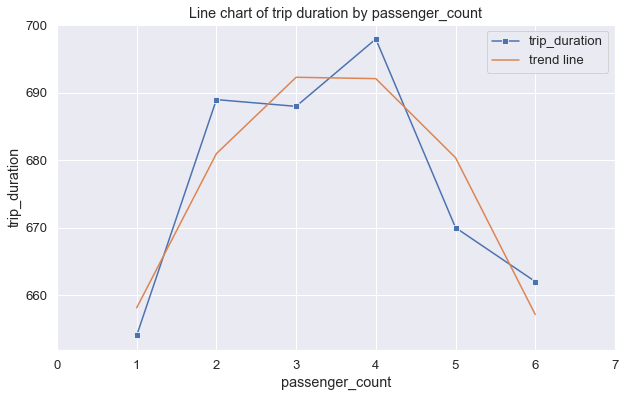

In [33]:
# Vẽ biểu đồ
sns.set(font_scale=1.2, style='darkgrid')
myline(df_passenger_count_duration, x ='passenger_count', y ='trip_duration', deg=2, figsize=(10,6));
plt.xticks(np.arange(8));


- <span style ="color:blue"> Nhận xét:
    - Các chuyến đi với 4 hành khách có thời gian cao nhất, thấp nhất với 1 hành khách.
    

- Kiểm tra thống kê F-test

In [34]:
# Lọc dữ liệu để giảm ảnh hưởng của nhiễu
from filter_outlier import filter_outlier_value_range
df_passenger_count_duration_filter = filter_outlier_value_range(df_passenger_count_duration, filter_columns=['trip_duration'])
df_passenger_count_duration_filter.describe()


,passenger_count,trip_duration
count,1.383865e+06,1.383865e+06
mean,1.660952e+00,7.312386e+02
std,1.312633e+00,4.474338e+02
min,1.000000e+00,1.000000e+00
25%,1.000000e+00,3.840000e+02
50%,1.000000e+00,6.310000e+02
75%,2.000000e+00,9.910000e+02
max,6.000000e+00,2.087000e+03


In [35]:
from scipy import stats

df_F_test = df_passenger_count_duration_filter.groupby('passenger_count', as_index=False)

f_val, p_val = stats.f_oneway(*[df_F_test.get_group(i)['trip_duration'] for i in range(1,7)])  
f_val, p_val


(158.15347017697536, 1.2860581883343123e-168)

- <span style ="color:blue"> Nhận xét:
    - Giá trị F-test lớn và p-value bé chứng tỏ các giá trị là có khác biệt
    

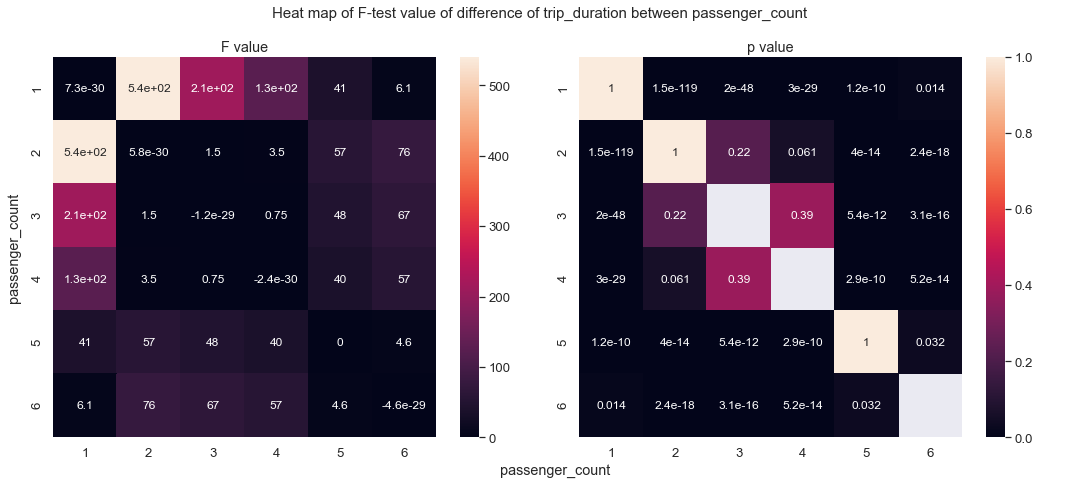

In [36]:
from scipy import stats
import seaborn as sns

sns.set(font_scale=1.2)
sns.set_style("dark")

F_val = np.zeros([6,6])
P_val = np.zeros([6,6])
for i in range(1, 7):
    for j in range(1, 7):
        f_val, p_val = stats.f_oneway(df_F_test.get_group(i)['trip_duration'],
                                      df_F_test.get_group(j)['trip_duration'])  
        F_val[i-1,j-1] = f_val
        P_val[i-1,j-1] = p_val
        
df_F_val = pd.DataFrame(F_val, columns=[1,2,3,4,5,6])
df_P_val = pd.DataFrame(P_val, columns=[1,2,3,4,5,6])

fig, ax = plt.subplots(1, 2, figsize=(18,7))
fig_1 = sns.heatmap(df_F_val, annot=True, annot_kws={"size": 12}, yticklabels=[1,2,3,4,5,6], ax=ax[0])
fig_1.set_title('F value');
fig_2 = sns.heatmap(df_P_val, annot=True, annot_kws={"size": 12}, yticklabels=[1,2,3,4,5,6], ax=ax[1])
fig_2.set_title('p value');
fig.suptitle('Heat map of F-test value of difference of trip_duration between passenger_count', fontsize=15);

fig.add_subplot(111, frame_on=False);
plt.tick_params(labelcolor="none", bottom=False, left=False);
plt.xlabel("passenger_count");
plt.ylabel("passenger_count");
plt.subplots_adjust(wspace=0.1);


- <span style ="color:blue"> Nhận xét:
    - Dựa trên đồ thị và bảng F-test ta có thể chia thành 3 nhóm chính: nhóm 1 là 1 hành khách, nhóm 2 là 2,3,4 hành khách và nhóm 3 là 5 và 6 hành khách

#### 3.2.3.2  Tiếp theo ta phân tích mối tương quan giữa nhà cung cấp đến thời gian chuyến đi

In [37]:
# Tạo bảng dữ liệu
df_vendor_id_duration = df_trip[['vendor_id', 'trip_duration', 'log10_trip_duration']]
df_vendor_id_duration.head()


,vendor_id,trip_duration,log10_trip_duration
0,2,455,2.658011
1,1,663,2.821514
2,2,2124,3.327155
3,2,429,2.632457
4,2,435,2.638489


In [38]:
# Lọc dữ liệu trip_duration
from filter_outlier import filter_outlier_value_range
df_vendor_id_duration = filter_outlier_value_range(df_vendor_id_duration, filter_columns=['trip_duration'])
df_vendor_id_duration.describe()


,vendor_id,trip_duration,log10_trip_duration
count,1.383926e+06,1.383926e+06,1.383926e+06
mean,1.533509e+00,7.312138e+02,2.771056e+00
std,4.988761e-01,4.474471e+02,3.121629e-01
min,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,3.840000e+02,2.584331e+00
50%,2.000000e+00,6.310000e+02,2.800029e+00
75%,2.000000e+00,9.910000e+02,2.996074e+00
max,2.000000e+00,2.087000e+03,3.319522e+00


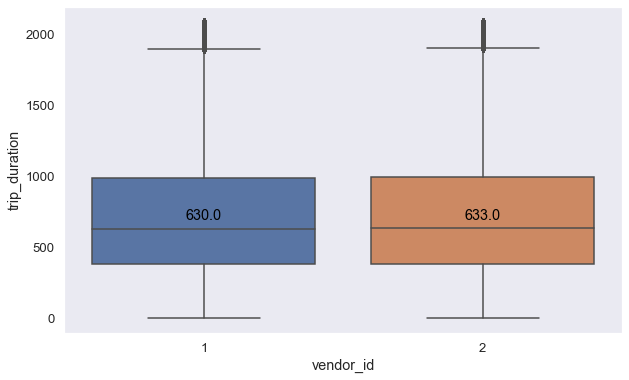

In [39]:
# Vẽ đồ thị thời gian chuyến đi theo nhà cung cấp
plt.figure(figsize=(10,6))
box_plot = sns.boxplot(x="vendor_id", y="trip_duration", data=df_vendor_id_duration);
medians = df_vendor_id_duration.groupby(['vendor_id'])['trip_duration'].median()
vertical_offset = df_vendor_id_duration['trip_duration'].median() * 0.1 

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians[xtick+1] + vertical_offset, medians[xtick+1],
                  horizontalalignment='center', color='black')
    #print(medians[xtick+1])
   

- Kiểm tra thống kê F-test với thời gian chuyến đi giữa 2 nhà cung cấp

In [40]:
from scipy import stats
import seaborn as sns
df_F_test = df_vendor_id_duration.groupby('vendor_id',as_index=False)
f_val, p_val = stats.f_oneway(df_F_test.get_group(1)['trip_duration'],
                              df_F_test.get_group(2)['trip_duration'])  
f_val, p_val


(34.07627426138102, 5.3005251205185375e-09)

- <span style ="color:blue"> Nhận xét:
    - Có sự khác biệt thời gian chuyến đi giữa 2 nhà cung cấp trên dựa trên giá trị F và p. Thời gian di chuyển của nhà cung cấp 1 là nhanh hơn nhà cung cấp 2 chỉ 3 giây. 
    

#### 3.2.3.3  Cuối cùng ta phân tích mối quan hệ giữa nhà cung cấp và số hành khách đến thời gian chuyến đi

In [41]:
# Tạo bảng dữ liệu
df_vd_pc = df_trip[['vendor_id', 'passenger_count', 'trip_duration']]
df_vd_pc.head()


,vendor_id,passenger_count,trip_duration
0,2,1,455
1,1,1,663
2,2,1,2124
3,2,1,429
4,2,1,435


In [42]:
# Lọc dữ liệu
from filter_outlier import filter_outlier_value_range
df_vd_pc = filter_outlier_value_range(df_vd_pc, filter_columns=['trip_duration'])
df_vd_pc.head()


,vendor_id,passenger_count,trip_duration
0,2,1,455.0
1,1,1,663.0
3,2,1,429.0
4,2,1,435.0
5,2,6,443.0


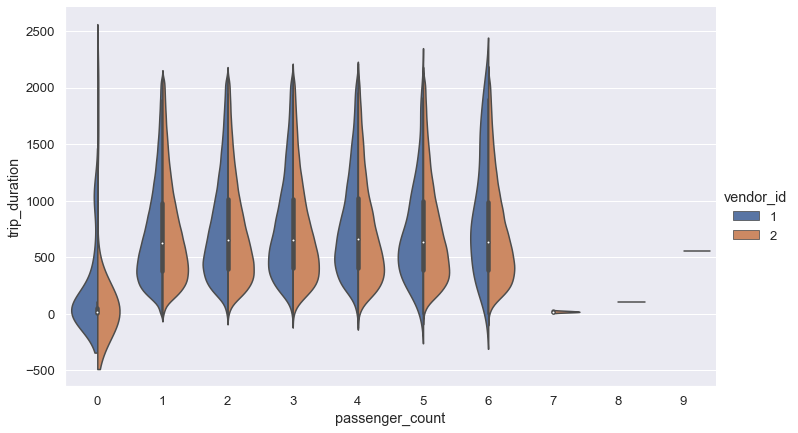

In [43]:
# Vẽ đồ thị biểu diễn 
import seaborn as sns
sns.set(font_scale=1.2, style='darkgrid')
sns.catplot(x="passenger_count", y="trip_duration",hue="vendor_id",
                kind="violin", split=True, data=df_vd_pc, height=6, aspect=10/6);


- <span style ="color:blue"> Nhận xét:
    - Không có sự khác nhau nhiều thời gian chuyến đi giữa 2 nhà cung cấp với số hành khách khác nhau
    

#### 3.2.4 Add more your questions:

#### 1. Việc lưu dữ liệu có liên quan tới thời gian chuyến đi hay không?    

In [44]:
# Tạo bảng dữ liệu
df_store_and_fwd_flag = df_trip[['store_and_fwd_flag', 'trip_duration', 'log10_trip_duration']]
df_store_and_fwd_flag.head()


,store_and_fwd_flag,trip_duration,log10_trip_duration
0,N,455,2.658011
1,N,663,2.821514
2,N,2124,3.327155
3,N,429,2.632457
4,N,435,2.638489


In [45]:
# Lọc dữ liệu để giảm ảnh hưởng của nhiễu
from filter_outlier import filter_outlier_value_range

df_store_and_fwd_flag = filter_outlier_value_range(df_store_and_fwd_flag, filter_columns=['trip_duration'])
df_store_and_fwd_flag.head()


,store_and_fwd_flag,trip_duration,log10_trip_duration
0,N,455.0,2.658011
1,N,663.0,2.821514
3,N,429.0,2.632457
4,N,435.0,2.638489
5,N,443.0,2.646404


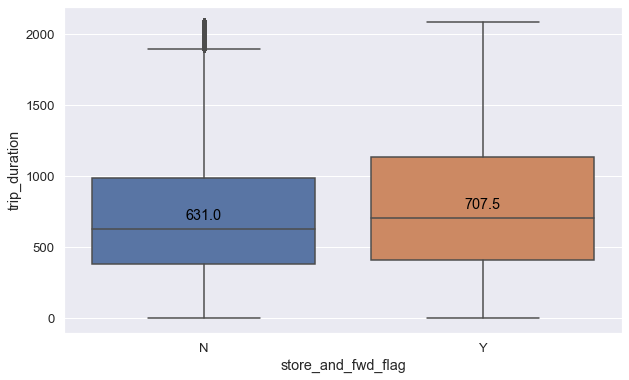

In [46]:
# Vẽ đồ thị thời gian chuyến đi theo nhà cung cấp
plt.figure(figsize=(10,6))
box_plot = sns.boxplot(x="store_and_fwd_flag", y="trip_duration", data=df_store_and_fwd_flag);
medians = df_store_and_fwd_flag.groupby(['store_and_fwd_flag'])['trip_duration'].median()
vertical_offset = df_store_and_fwd_flag['trip_duration'].median() * 0.1 

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians[xtick] + vertical_offset, medians[xtick],
                  horizontalalignment='center', color='black')
   

- Kiểm tra thống kê F-test

In [47]:
from scipy import stats

df_F_test = df_store_and_fwd_flag.groupby(['store_and_fwd_flag'], as_index=False)
get_group_N = df_F_test.get_group('N')['trip_duration']
get_group_Y = df_F_test.get_group('Y')['trip_duration']

f_val, p_val = stats.f_oneway(get_group_N, get_group_Y)
f_val, p_val


(203.4620449896679, 3.695276941147477e-46)

- <span style ="color:blue"> Nhận xét:
    - Giá trị F-test rất lớn và p-value bé, sự khác biệt của 2 nhóm dữ liệu là có ý nghĩa thống kê. Thời gian di chuyển khi không lưu dữ liệu là nhanh hơn khi lưu và chuyển dữ liệu
    

#### 2. Phân tích số chuyến taxi theo giờ và vị trí đón trên bản đồ

In [48]:
# Tạo bảng dữ liệu 
df_location_hour = df_trip[['pickup_latitude', 'pickup_longitude', 'hour']]
df_location_hour['count'] = 1
df_location_hour_group = df_location_hour.groupby(['pickup_latitude', 'pickup_longitude', 'hour'], as_index=False).sum()
df_location_hour_group.head()


,pickup_latitude,pickup_longitude,hour,count
0,34.359695,-65.848389,20,1
1,34.712234,-75.354332,16,1
2,35.081532,-71.799896,20,1
3,35.310307,-72.074333,9,1
4,36.029301,-77.440750,17,1


In [49]:
# Tạo list của list ['pickup_latitude', 'pickup_longitude', 'count'] theo giờ
list_hour = df_location_hour_group.hour.sort_values().unique()
df_location_hour_list = []
for hour in list_hour:
    data = df_location_hour_group.loc[df_location_hour_group.hour==hour, ['pickup_latitude', 'pickup_longitude', 'count']].values.tolist()
    df_location_hour_list.append(data)
df_location_hour_list[0][:5]


[[40.27629089355469, -74.70536804199219, 1.0],
 [40.39472961425781, -74.58442687988281, 1.0],
 [40.52936553955078, -74.31640625, 1.0],
 [40.56703186035156, -73.97392272949219, 1.0],
 [40.58508682250977, -73.69087982177734, 1.0]]

In [ ]:
import folium
from folium.plugins import HeatMapWithTime

lat = df_trip['pickup_latitude'].median()
long = df_trip['pickup_longitude'].median()

NYC_map = folium.Map(location=[lat, long], zoom_start = 11)

heatmap = HeatMapWithTime(df_location_hour_list,
                          index=[x for x in range(24)],
                          radius=5, 
                          gradient={0.2: 'white', 0.6:'yellow', 1: 'red'}, 
                          min_opacity=0.4, 
                          max_opacity=0.8, 
                          use_local_extrema=True)

heatmap.add_to(NYC_map)
NYC_map


#### 3. Phân tích thời gian chuyến đi theo giờ và vị trí đón trên bản đồ

In [51]:
# Tạo bảng dữ liệu 
from filter_outlier import filter_outlier_value_range
df_location_hour_duration = df_trip[['pickup_latitude', 'pickup_longitude', 'hour', 'trip_duration']]
df_location_hour_duration = filter_outlier_value_range(df_location_hour_duration, filter_columns=['trip_duration'])
df_location_hour_duration_group = df_location_hour_duration.groupby(['pickup_latitude', 'pickup_longitude', 'hour'], as_index=False).mean()
df_location_hour_duration_group.head()


,pickup_latitude,pickup_longitude,hour,trip_duration
0,34.359695,-65.848389,20,961.0
1,34.712234,-75.354332,16,875.0
2,35.081532,-71.799896,20,611.0
3,35.310307,-72.074333,9,317.0
4,36.029301,-77.440750,17,782.0


In [52]:
# Tạo list của list ['pickup_latitude', 'pickup_longitude', 'trip_duration'] theo giờ
list_hour = df_location_hour_duration_group.hour.sort_values().unique()
df_location_hour_duration_list = []
for hour in list_hour:
    data = df_location_hour_duration_group.loc[df_location_hour_duration_group.hour==hour,
                                               ['pickup_latitude', 'pickup_longitude', 'trip_duration']].values.tolist()
    df_location_hour_duration_list.append(data)
df_location_hour_duration_list[0][:5]


[[40.27629089355469, -74.70536804199219, 8.0],
 [40.39472961425781, -74.58442687988281, 28.0],
 [40.52936553955078, -74.31640625, 41.0],
 [40.56703186035156, -73.97392272949219, 453.0],
 [40.58508682250977, -73.69087982177734, 81.0]]

In [ ]:
import folium
from folium.plugins import HeatMapWithTime

lat = df_trip['pickup_latitude'].median()
long = df_trip['pickup_longitude'].median()

NYC_map = folium.Map(location=[lat, long], zoom_start = 12)

heatmap = HeatMapWithTime(df_location_hour_duration_list,
                          index=[x for x in range(24)],
                          radius=3, 
                          gradient={0.2: 'blue', 0.6: 'yellow', 1: 'red'}, 
                          min_opacity=0.4, 
                          max_opacity=0.8, 
                          use_local_extrema=False)

heatmap.add_to(NYC_map)
NYC_map


- <span style ="color:blue"> Nhận xét:
    - Qua bản đồ ta thấy rõ ở hầu hết địa điểm vào những giờ yên tĩnh (từ 1h đến 6h) mật độ hoạt động và thời gian chuyến đi là thấp hơn so với những giờ còn lại.

- Xin tiếp tục theo dõi phần tiếp theo trong file *NYC Taxi EDA - forStudent_3.ipynb*. Trước khi sang phần 3 ta sẽ tiến hành lưu lại dữ liệu của các bảng đã được xử lý.

In [54]:

df_trip.to_csv('data/trip_ver_3.csv', index=False)
